In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.date_dayfirst", True)
pd.set_option("display.date_yearfirst", False)
#pd.describe_option('display.date_yearfirst')
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid') #matplotlib now also has styles which can be imported for ease
#plt.style.available
%matplotlib inline
import matplotlib.mlab as mlab
from datetime import datetime
from scipy import stats

import matplotlib.pylab as pylab

## For graphing - nice to look at and simple plots, but with less control than matplotlib
#import seaborn as sns
#sns.set_style('whitegrid')
#sns.set_context("talk") # larger text etc. Use sns.set() to go back to default

import os
cwd = os.getcwd()

# Import file into pandas dataframe

In [4]:
#mainpath = 'C:/Users/mb22/OneDrive/PhD/Quasar Shared/'
#filepath = 'Data/NPL_Table_All.xlsx'

new_file = True

if new_file == True:
    filepath = 'Data to Import/OP_pickles/OP_all_data_5perc_cutoff_NEW-2017.pkl'
    all_data = pd.read_pickle(filepath)
    print('"' + filepath + '" imported')

else:
    filepath = 'Data to Import/All_Ext_OPs-Jan-Jun2015-06Apr16-Anon.xlsx'

    #fullpath=mainpath+filepath
    fullpath=cwd+'/'+filepath # use if need to specify full path for some reason.
    print(fullpath) #note forward and backward slashes in output

    #all_data = pd.read_excel(filepath, parse_dates=['Date'])
    all_data = pd.read_excel(filepath)
    #all_data.head(2)

all_data.describe()

"Data to Import/OP_pickles/OP_all_data_5perc_cutoff_NEW-2017.pkl" imported


,Centre_ID,Group,Linac_ID,OP_Dif,Week,Month,date_delta,weekday
count,24501.000000,24501.000000,24501.000000,24501.000000,24501.000000,24501.000000,24501.000000,24501.000000
mean,21.584180,4.259704,101.157218,-0.009354,14.181013,3.548712,91.434170,2.109914
std,15.938045,2.248378,59.686101,0.878064,7.429770,1.709769,51.964636,1.531586
min,1.000000,1.000000,1.000000,-4.400000,1.000000,1.000000,0.000000,0.000000
25%,10.000000,2.000000,53.000000,-0.600000,8.000000,2.000000,47.000000,1.000000
50%,18.000000,4.000000,99.000000,0.000000,14.000000,4.000000,91.000000,2.000000
75%,36.000000,6.000000,148.000000,0.561393,21.000000,5.000000,137.000000,3.000000
max,52.000000,9.000000,204.000000,3.980000,27.000000,6.000000,180.797662,6.000000


## Remove Unwanted Dates & Outliers

In [5]:
## if importing usual file then no need to do this.
if new_file == True:

    cutoff_perc = 5.0

    all_data = all_data[(all_data.OP_Dif >-cutoff_perc)
                       & (all_data.OP_Dif < cutoff_perc)
                       & (all_data.Date < "01/July/2015")
                       & (all_data.Date >= "01/Jan/2015")]
    all_data.describe()
    #all_data.head()
else:
    print("Not required")

### Add a columns containing the week and month numbers and if Farmer used.

In [6]:
## only need to do this for new data files
if new_file == True:
    all_data['Week'] = all_data['Date'].dt.week
    all_data['Month'] = all_data['Date'].dt.month

    ## check if Farmer is used and set value in Farmer column
    is_farmer = all_data.Measurement_Device.str.contains('Farmer')
    all_data['Farmer'] = pd.Series(['Farmer'] * len(all_data)) * is_farmer

    ##Set blank values of farmer to 'No
    all_data.Farmer[all_data.Farmer == ''] = 'Non-Farmer'
else:
    print("Not required")


C:\Users\mb22\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
print(all_data['Farmer'].unique())
all_data[20:22]

['Farmer' 'Non-Farmer']


,Centre_ID,NHS_PP,Group,Linac_Manufacturer,Linac_Model,Linac_Install_Date,Linac_ID,Date,Measurement_Device,OP_Dif,Recording,Comments,Week,Month,Farmer,date_delta,Short_Date,weekday
20,1,NHS,5,Elekta,Agility,2014,1,2015-06-18,Farmer,-0.4,Paper,NaN,25,6,Farmer,168.0,18/06/2015,3
21,1,NHS,5,Elekta,Agility,2014,1,2015-01-02,Linacheck,-0.7,Paper,NaN,1,1,Non-Farmer,1.0,02/01/2015,4


In [8]:
## save DF as a pickle file for simple import.
#all_data.to_pickle('OP_all_data_5perc_cutoff.pkl')

In [9]:
## produce histograms of each linacs farmer and other data (more conventional than violin plots)

plt.figure(figsize=(4, 3))
plt.style.use('ggplot')

## get list of all centres
centres = sorted(all_data['Centre_ID'].unique())
centres.insert(0,1)

centres=[14,14]
#print(centres)
## remove centre 14 as coming up with error when plotting
#if 14 in centres: centres.remove(14)
#print(centres)
## loop through each centres data
for centre_use in centres:
    centre_data = all_data[all_data['Centre_ID']==centre_use]
    ## get list of linacs in current centre
    linacs = sorted(centre_data['Linac_ID'].unique())
    
    ## plot for each linac
    for linac_use in linacs:
        ## get current linac data
        linac_data = centre_data[centre_data['Linac_ID']==linac_use]
        
        ## extract farmer and non-farmer data
        farmer_data = linac_data[linac_data['Farmer']=='Farmer']
        non_farmer_data = linac_data[linac_data['Farmer']!='Farmer']

        #plt.hist(farmer_data['OP_Dif'], alpha = 1, normed=True, label = 'Farmer',
        #         range=(-5,5), bins=25, color='Black', histtype='step')
        #plt.hist(non_farmer_data['OP_Dif'], alpha = 1, normed=True, label = 'Non-Farmer',
        #         range=(-5,5), bins=25, color='Green', histtype='step')

        ## can plot both sets of data with a single command
        ## matplotlib plot
        farmer_label = 'Farmer (n=' + str(len(farmer_data['OP_Dif'])) + ')'
        non_farmer_label = 'Non-Farmer (n=' + str(len(non_farmer_data['OP_Dif'])) + ')'
        
        plt.hist((farmer_data['OP_Dif'],non_farmer_data['OP_Dif']), alpha = 0.5, normed=True, label = (farmer_label,non_farmer_label),
                 range=(-5,5), bins=30, color=('Green','Blue'), histtype='stepfilled')
        
        ## add fitted gaussians to the plot
        
        mean_farmer = np.mean(farmer_data['OP_Dif'])
        sd_farmer = np.std(farmer_data['OP_Dif'])
        mean_non_farmer = np.mean(non_farmer_data['OP_Dif'])
        sd_non_farmer = np.std(non_farmer_data['OP_Dif'])
        
        x_fit = np.linspace(-3,3,121)
        plt.plot(x_fit, stats.norm.pdf(x_fit,mean_farmer,sd_farmer),
                 ls='-', color='DarkGreen')
        plt.plot(x_fit, stats.norm.pdf(x_fit,mean_non_farmer,sd_non_farmer),
                 ls='-', color='DarkBlue')
        
        ## calculate p-stat and put on plot
        compare_result = stats.ttest_ind(farmer_data['OP_Dif'],non_farmer_data['OP_Dif'], equal_var = False)
        p_val = compare_result[1]
        
        ## use axis limits to position text consistently
        ymin, ymax= plt.ylim()
        
        if p_val < 0.001:
            p_val_text = 'p-val: <0.001'
        else:
            p_val_text = 'p-val: ' + str(round(p_val,3))       
        #plt.annotate(p_val_text,(1.5,0.8*ymax))
        
        ## calcualte mean dif and add to plot
        mean_dif = mean_farmer - mean_non_farmer
        mean_text = 'mean dif (%): ' + str(round(mean_dif,1))
        #plt.annotate(mean_text,(1.5,0.9*ymax))
        
        ## add indicator if p<0.05 and dif > 0.5
        
        if p_val < 0.05 and abs(mean_dif) > 0.5:
            info_text = '*Large Sig Dif'
        else:
            info_text = ''
        #plt.annotate(info_text,(-2.5,0.9*ymax))
        
        #plt.plot()
        
        ## seaborn plot with kernal density estimate added ## note is fails if no data to plot
        #print(centre_use,linac_use,len(farmer_data['OP_Dif']),len(non_farmer_data['OP_Dif']))
        #if len(farmer_data['OP_Dif']!=0):
        #    sns.distplot(farmer_data['OP_Dif'],label = 'Farmer', fit=stats.norm, kde=False)
        #if len(non_farmer_data['OP_Dif']!=0):
        #    sns.distplot(non_farmer_data['OP_Dif'], label='Non-Farmer', fit=stats.norm, kde=False)

        ## add useful info to plot
        plt.xlim(-3,3)
        plt.xlabel('Output Dif (%)')
        plt.ylabel('Relative Proportion')
        plt.title('Centre ' + str(centre_use) + ', Linac ' + str(linac_use))
        plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))

        #plt.savefig(('OPs/Farmer Comparison/Linacs/gauss/C' + str(centre_use) + 'L' + str(linac_use) + '-gauss.png'), bbox_inches='tight', dpi=300)
        plt.close()

print('Plots produced')

C:\Users\mb22\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6016: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()
C:\Users\mb22\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1646: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0)
C:\Users\mb22\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:872: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
C:\Users\mb22\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:872: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= self.b)
C:\Users\mb22\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1647: RuntimeWarning: invalid value encountered in greater
  cond1 = self._support_mask

Plots produced


In [11]:
## produce plots for each linac in a centre

centres = sorted(all_data['Centre_ID'].unique())
#print(centres)
#centre_use = 1

#centres = [1,2,3]

for centre_use in centres:
    centre_data = all_data[all_data['Centre_ID']==centre_use].sort_values(by='Date')

    linacs = sorted(centre_data['Linac_ID'].unique())
    #print(linacs)

    for linac_use in linacs:
        linac_data = centre_data[centre_data['Linac_ID'] == linac_use]
        plt.plot(linac_data['Date'],linac_data['OP_Dif'],label=linac_use)

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Linac ID')
    plt.ylim(-3,3)
    plt.title('Linac Outputs for Centre ' + str(centre_use))
    plt.xlabel('Date')
    plt.ylabel('Output (%)')
    plt.xlim(min(centre_data['Date'])-pd.DateOffset(days=2),max(centre_data['Date'])+pd.DateOffset(days=2))
    #plt.savefig(('OPs/centres/OPs-' + str(centre_use) + '.png'), bbox_inches='tight', dpi=300)
    plt.close()

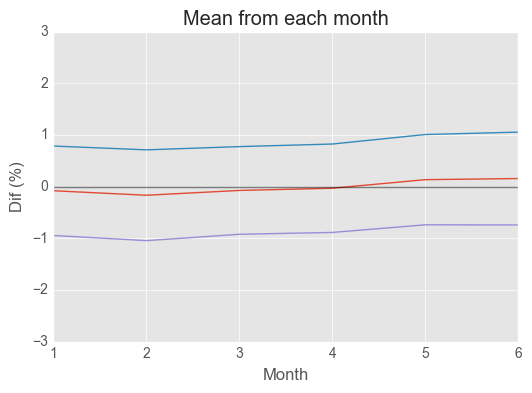

In [12]:
## Plot the mean results (+/- SD) for each month
month_mean = all_data.groupby('Month').mean()
month_sd = all_data.groupby('Month').std()
plt.plot(month_mean['OP_Dif'])
plt.plot(month_mean['OP_Dif'] + month_sd['OP_Dif'])
plt.plot(month_mean['OP_Dif'] - month_sd['OP_Dif'])
plt.ylim(-3,3)
plt.axhline(0, color='Black', alpha=0.5)
plt.xlabel("Month")
plt.ylabel("Dif (%)")
plt.title("Mean from each month")
#weeks['OP_Dif'].describe()
## Shows dip in measurement frequency at easter
##Dips on ends due to week 1 and 27 only havign 2 days of data within their weeks
#week_plot = all_data['OP_Dif'].hist(by=all_data['Month'], figsize=(8,8))


# Calculate some stats & check data types

In [14]:
mean = np.mean(all_data['OP_Dif'])
sd = np.std(all_data['OP_Dif'])
all_data.describe()
all_data.dtypes

#all_data.groupby(['Type'])['Energy'].nunique().reset_index() # number of unique dates = number of visits

Centre_ID                      int64
NHS_PP                        object
Group                          int64
Linac_Manufacturer            object
Linac_Model                   object
Linac_Install_Date            object
Linac_ID                       int64
Date                  datetime64[ns]
Measurement_Device            object
OP_Dif                       float64
Recording                     object
Comments                      object
Week                           int64
Month                          int64
Farmer                        object
date_delta                   float64
Short_Date                    object
weekday                        int64
dtype: object

# Make some quick graphs

### Plots groups by various parameters
 -Manufacturer/Model/Year of install/Region

# Histograms

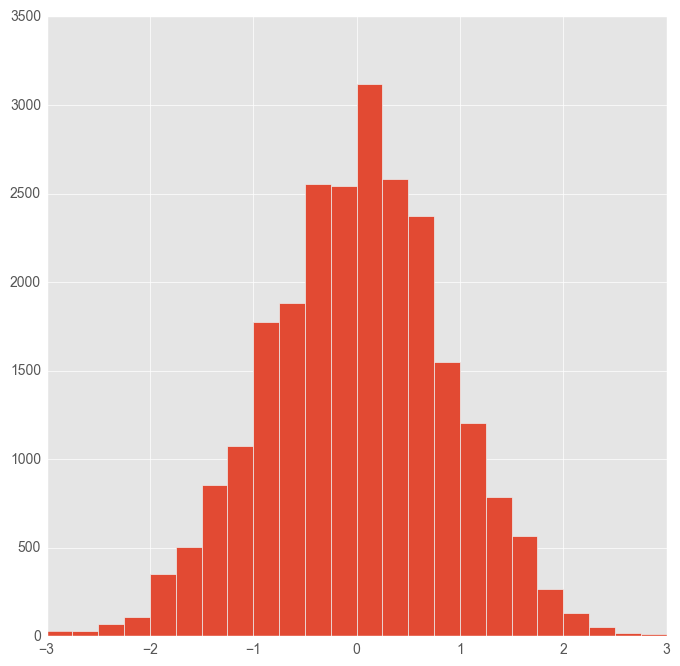

In [15]:
## Linac Manufacturer
#all_data['OP_Dif'].hist(by=all_data['Linac_Manufacturer'], normed=False, bins=21, range=(-3,3), rwidth=1, figsize=(10,7), layout=(2,3))
#plt.savefig('OPs/All_Hist_Manufacturer.png', bbox_inches='tight', dpi=300)

## Linac Model
#all_data['OP_Dif'].hist(by=all_data['Linac_Model'], normed=False, bins=11, range=(-3,3), rwidth=1, figsize=(18,18))
#plt.savefig('OPs/All_Hist_Model.png', bbox_inches='tight', dpi=300)

## Install Year
#all_data['OP_Dif'].hist(by=all_data['Linac_Install_Date'], normed=False, bins=11, range=(-3,3), rwidth=1, figsize=(16,9), layout=(3,6))
#plt.savefig('OPs/All_Hist_Year.png', bbox_inches='tight', dpi=300)

## Centre
#all_data['OP_Dif'].hist(by=all_data['Centre_ID'], normed=False, bins=11, range=(-3,3), rwidth=1, figsize=(18,18))
#plt.savefig('OPs/All_Hist_Centre.png', bbox_inches='tight', dpi=300)

## Region
#all_data['OP_Dif'].hist(by=all_data['Group'], normed=False, bins=21, range=(-3,3), rwidth=1, figsize=(8,8))
#plt.savefig('OPs/All_Hist_Region.png', bbox_inches='tight', dpi=300)

## All Data
all_data['OP_Dif'].hist(normed=False, bins=24, range=(-3.0,3.0), rwidth=1, figsize=(8,8))
#plt.savefig('OPs/All_Hist.png', bbox_inches='tight', dpi=300)

plt.show()


# Get some more stats such as Mean, SD, Skew etc.

In [16]:
from scipy import stats

print('Skew: ', all_data['OP_Dif'].skew())
print('SEM: ', all_data['OP_Dif'].sem())
print('Mean: ', all_data['OP_Dif'].mean())
print('SD: ', all_data['OP_Dif'].std()) # Need to remove outliers for useful stats
print('Kurtosis: ', all_data['OP_Dif'].kurtosis())
print('stats.kurtosis: ', stats.kurtosis(all_data['OP_Dif'], axis=0, fisher=False, bias=False))
print('Max: ', all_data['OP_Dif'].max())
print('Min: ', all_data['OP_Dif'].min())

print('Skew Test: ', stats.skewtest(all_data['OP_Dif']))
print('Kurtosis Test: ', stats.kurtosistest(all_data['OP_Dif']))
print('Norm Test: ', stats.normaltest(all_data['OP_Dif']))


Skew:  -0.0669038624225
SEM:  0.00560962869641
Mean:  -0.009353648719236043
SD:  0.8780636956777672
Kurtosis:  0.328966077359
stats.kurtosis:  3.328966077358657
Max:  3.98
Min:  -4.4
Skew Test:  SkewtestResult(statistic=-4.2715885176885591, pvalue=1.9408545805848605e-05)
Kurtosis Test:  KurtosistestResult(statistic=9.0786470386213178, pvalue=1.0993281343184838e-19)
Norm Test:  NormaltestResult(statistic=100.66830051631636, pvalue=1.3808811193618364e-22)


### Non-normal?
The tests for normality have p values which indicate the resutls are non-normal. 
This is liekly due tot he large amounts of data, which can cause even very small deviations from normality to be statistically different from normal.

I think in our case, if required the distributions can be considered as normal (e.g. if want to calcualte how many centres are outside a given range)

# Plot of All Audits

In [17]:
# Calculate rolling SD of 20 values

all_data_datesort = all_data.sort_values(by='Date', ascending=True)

all_data_datesort['SD_Prev1000'] = np.nan
#all_data_datesort['SD_Prev1000'] = pd.rolling_std(all_data_datesort['OP_Dif'],window=1000) ## pre v18 of pandas
all_data_datesort['SD_Prev1000'] = all_data_datesort['OP_Dif'].rolling(window=1000,center=False).std()

#all_data_datesort['Mean_Prev1000'] = pd.rolling_mean(all_data_datesort['OP_Dif'],window=1000) ## pre v18 of pandas
all_data_datesort['Mean_Prev1000'] = all_data_datesort['OP_Dif'].rolling(window=1000,center=False).mean()

all_data_datesort.tail(3)


,Centre_ID,NHS_PP,Group,Linac_Manufacturer,Linac_Model,Linac_Install_Date,Linac_ID,Date,Measurement_Device,OP_Dif,Recording,Comments,Week,Month,Farmer,date_delta,Short_Date,weekday,SD_Prev1000,Mean_Prev1000
10950,16,NHS,3,Elekta,Elekta Precise Standard Head MLCi,2002,90,2015-06-30,Farmer,0.000000,Spreadsheets,NaN,27,6,Farmer,180.0,30/06/2015,1,0.875225,0.225102
9248,11,NHS,1,Siemens,Oncor,2008,70,2015-06-30,Linacheck,0.256410,Database + automatic transfer from linachecks ...,NaN,27,6,Non-Farmer,180.0,30/06/2015,1,0.874882,0.224359
24500,52,NHS,6,Elekta,Agility,2006,204,2015-06-30,QA3,1.641026,Atlas Database,Users would like to be able to get data out in...,27,6,Non-Farmer,180.0,30/06/2015,1,0.876017,0.225910


### To do with OPs

- Loop through each linac and calc mean & SD for outputs.
	- SD will give indication of measurement variability
	- Can plot spread of means = variation present depending on linac which treated on.
	- Output table (array) of linac ID, mean, SD
- Loop through each centre - done by using 'groupby'
    - Mean + SD for each centre

## Centre grouping

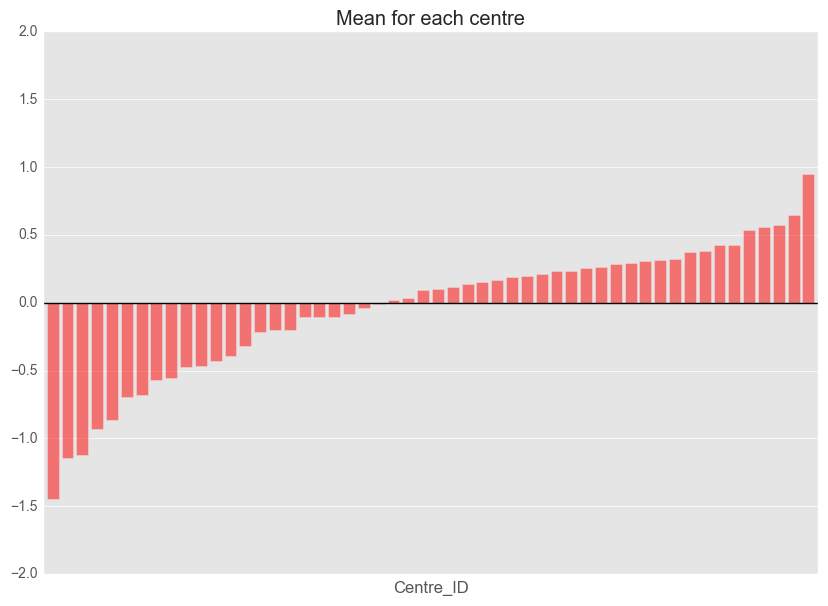

In [18]:
m = all_data_datesort[(all_data_datesort.OP_Dif >-5) & (all_data_datesort.OP_Dif < 5)] # remove outliers

#m = all_data_datesort
g = m.groupby('Centre_ID')
gmean = g.mean()
#gmean = gmean.sort(['OP_Dif'], ascending=True) ## pre v18 of pandas
gmean = gmean.sort_values(by='OP_Dif', ascending=True)
gsd=g.std()
gsdneg=-gsd
gsdnorm=gmean+gsd # to ensure SD is centred around mean
gsdnegnorm=gmean-gsd

## If want to also show SD on same plot, then need to order the SDs in the same order as the means...

plt.figure(figsize=(10,7))
myplotcentre = gmean['OP_Dif'].plot(kind='bar', color='red', alpha = 0.5, width=0.8)
#myplotcentre = gsdnorm['OP_Dif'].plot(kind='bar', color='blue', alpha = 0.5) # SD but best to do a box plot?
#myplotcentre = gsdnegnorm['OP_Dif'].plot(kind='bar', color='blue', alpha = 0.5)
plt.axhline(0, color='black')

myplotcentre.axes.get_xaxis().set_ticks([])

plt.ylim(-2,2)
plt.title("Mean for each centre")

#plt.savefig('OPs/All_Centre_Means-bar-corr.png', bbox_inches='tight', dpi=300)

## Linac Grouping

Mean Max: 1.63777777778
Mean Min: -2.09007092199
Mean Range: 3.72784869976


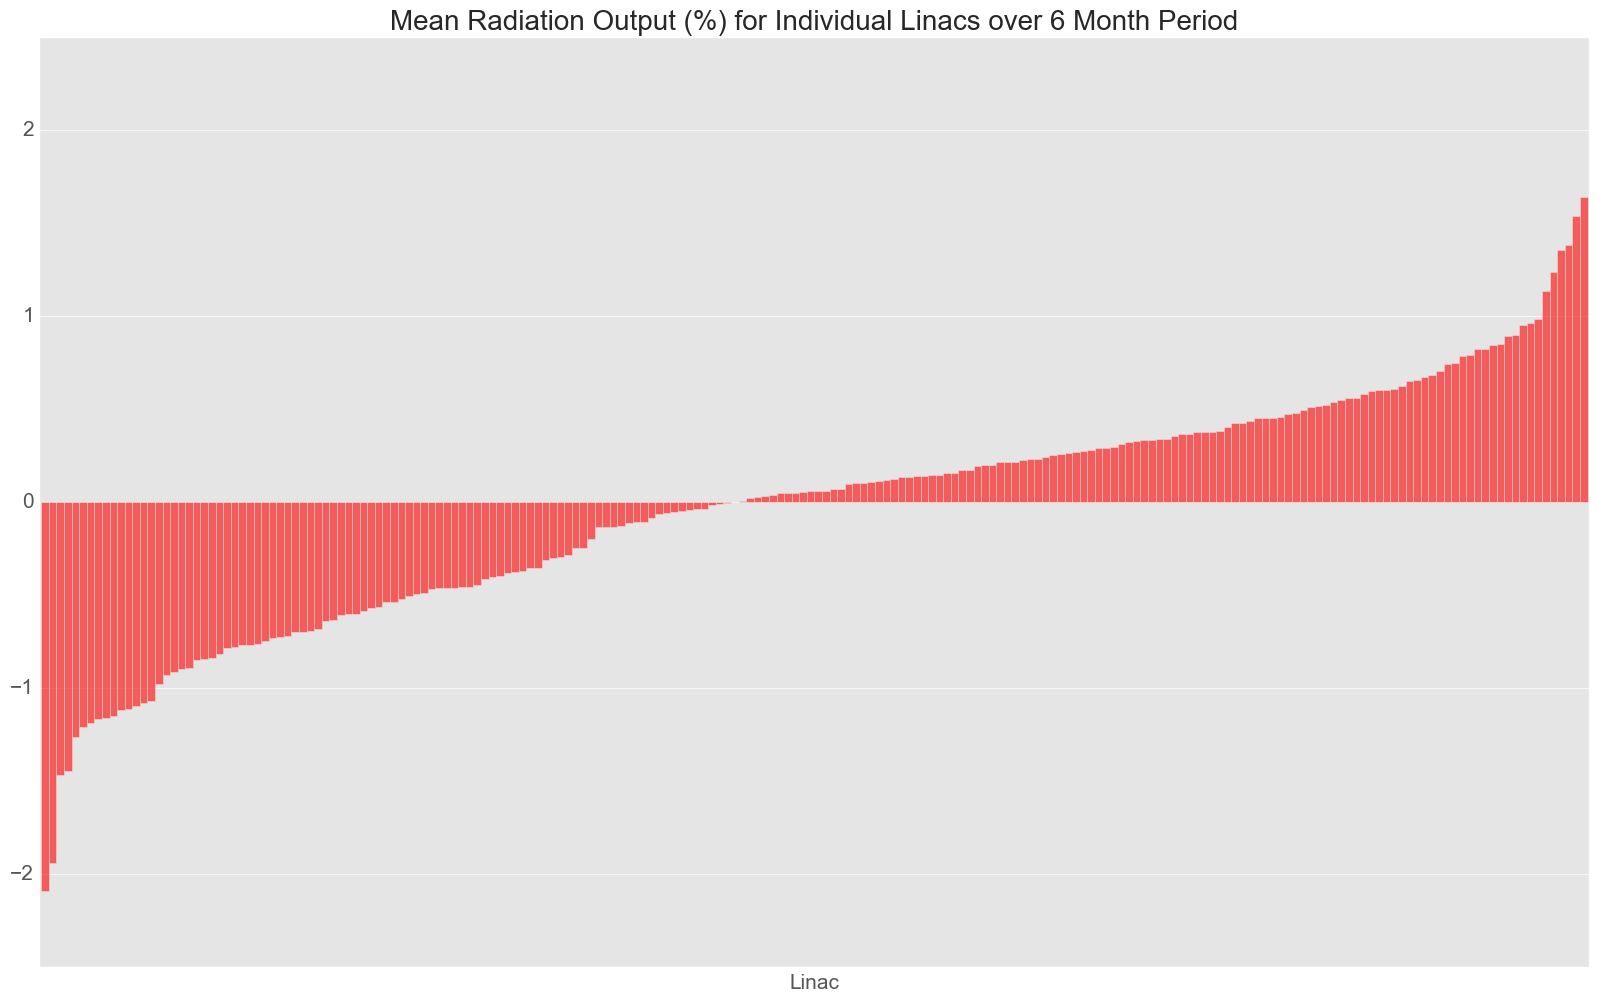

In [19]:
plt.figure(figsize=(20,12))
#plt.rcParams.update({'font.size': 22})
l = m.groupby('Linac_ID')
## calc mean for each linac
lmean = l.mean()
## sort into order
#lmean = lmean.sort(['OP_Dif'], ascending=True) ## pre v18 of pandas
lmean = lmean.sort_values(by='OP_Dif', ascending=True)
lsd=l.std()
#lsd = lsd.sort(['OP_Dif'])
lsdneg=-lsd
lsdnorm=lmean+lsd # to ensure SD is centred around mean
lsdnegnorm=lmean-lsd
myplotlinac = lmean['OP_Dif'].plot(kind='bar', color='red', alpha = 0.6, width = 1)
plt.title("Mean Radiation Output (%) for Individual Linacs over 6 Month Period", fontsize=20)

### These need to be ordered the same as the linacs to be useful
#myplotlinac = lsdnorm['OP_Dif'].plot(kind='bar', color='blue', alpha = 0.5, width = 0.5)
#myplotlinac = lsdnegnorm['OP_Dif'].plot(kind='bar', color='green', alpha = 0.5, width = 0.5)

myplotlinac.axes.get_xaxis().set_ticks([])
plt.yticks([-2,-1,0,1,2], fontsize = 15)
plt.xlabel("Linac", fontsize=15)
plt.ylim(-2.5,2.5)

mean_max = max(lmean['OP_Dif'])
mean_min = min(lmean['OP_Dif'])
mean_range = mean_max - mean_min
print('Mean Max: ' + str(mean_max))
print('Mean Min: ' + str(mean_min))
print('Mean Range: ' + str(mean_range))

#print(lsd.mean())

#plt.savefig('OPs/All_Linacs_Means-bar-corr-large_text1.png', bbox_inches='tight', dpi=300)

In [20]:
##save mean OPs as csv
lmean['OP_Dif'].to_csv(r'C:\Users\mb22\OneDrive\PhD\Quasar Shared\Modelling\IPython\OPs\Linac_means.csv')

In [21]:
## re-import means and get some stats
means_for_stats = pd.read_csv(r'C:\Users\mb22\OneDrive\PhD\Quasar Shared\Modelling\IPython\OPs\Linac_means.csv',header=None, names=['ID','Mean_OP'])
ms=means_for_stats['Mean_OP']
means_sd = ms.std()
means_sd

0.6341182236910439

In [22]:
## test means for normality

import scipy as sp

sp.stats.mstats.normaltest(ms)

## p-val is >0.05, so cannot say ti is not-normal. Tehrefore assume normal distribution for getting results
## i.e. can use the standard deviation to test how the variaiton in means affects the population.

NormaltestResult(statistic=3.8644272710798333, pvalue=0.14482724863695845)

In [23]:
## plot all linacs for a centre
centre_highlight = 1
l = m.groupby('Linac_ID')
l_centre = m[m.Centre_ID == centre_highlight]
linac_highlights = sorted(l_centre['Linac_ID'].unique())
#l_centre_highlight = l_centre_highlight.sort()
print(linac_highlights)
#table[table.column_name == some_value]

[1, 2, 3, 4, 5, 6, 7, 8]


In [24]:
#pick a linac ot highlight

run_all = False

## plot range of linacs
#linac_highlights = np.arange(1,max(m['Linac_ID'])+1) # all linacs (likely to run out of memory)
#centre_use = False

## select single linac
#linac_highlights=[1]
#centre_use = False

## plot all linacs for a centre
#centre_highlight = 2
centre_highlights = np.arange(1,max(m['Centre_ID'])+1)
centre_use = True

if run_all == True:
    for c in centre_highlights:
        centre_highlight = c

        l_centre = m[m.Centre_ID == centre_highlight]
        linac_highlights = sorted(l_centre['Linac_ID'].unique())

        ##group the data into Linac IDs
        l = m.groupby('Linac_ID')

        ## calc mean for each linac
        lmean = l.mean()

        ## sort values by the Output
        lmean_sort = lmean.sort_values(by='OP_Dif')

        ## get sorted OP values in an array
        lmean_op = np.array(lmean_sort['OP_Dif'])

        ## get sorted list of linac IDs in an array
        lmean_id = np.array(lmean_sort.index.values)

        ## make new array with ordered index for plot (i.e. 0 - 204 linacs)
        plot_index = np.arange(0,len(lmean_op))

        ## set figure size
        plt.figure(figsize=(20,12))

        ## create plot of all linacs
        plt.bar(plot_index, lmean_op, color='darkorange', alpha=0.8, width=1)

        for x in linac_highlights:

            linac_highlight = x

            ## get index of linac to highlight
            highlight_index = np.where(lmean_id==linac_highlight)[0][0]
            #print('Linac highlighted: ID = ' + str(linac_highlight))

            if centre_use == True:
                plt.bar(plot_index[highlight_index], lmean_op[highlight_index],
                    color='green', width=1)
            else:
                ## create plot of highlighted linac over the top
                plt.bar(plot_index[highlight_index], lmean_op[highlight_index],
                    color='green', width=1, label=('Linac ID: ' + str(linac_highlight)))

        if centre_use == True:
            str_label = ('Centre ID: ' + str(centre_highlight))
            plt.text(2, 2.5, str_label, fontsize=20)

        ## format plot
        plt.xlim(0,max(lmean_id))
        plt.ylim(-3,3)
        plt.axhline(0,color='black', alpha=0.8, linewidth=1)
        plt.title('Mean Linac Outputs', fontsize=20)
        plt.xlabel('Linac ID', fontsize=20)
        plt.ylabel('Mean Output (%)', fontsize=20)
        plt.legend(loc='upper left', fontsize=20)
        plt.grid(None)
        plt.gca().yaxis.grid(True)
        plt.gca().get_xaxis().set_ticks([])

        #plt.savefig('OPs/Linacs_vs_all/Centre_' + str(centre_highlight) +'.png', bbox_inches='tight', dpi=300)
        plt.close()
else:
    print("Not run")

Not run


### Show SD on graph as error bars
 - Would like these plotted in order

In [25]:
xyz = l['OP_Dif'].quantile(q=0.05)
xyz.head()

Linac_ID
1   -1.000
2   -1.665
3   -1.100
4   -1.523
5   -0.600
Name: OP_Dif, dtype: float64

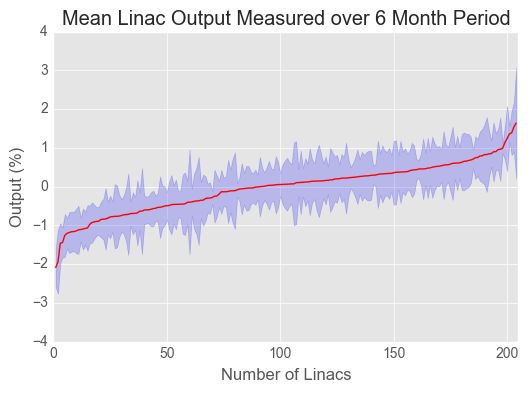

In [26]:
## group data into Linacs
l = m.groupby('Linac_ID')

## create arrays of mean/sd for OP
lmean = l['OP_Dif'].mean()
lsd = l['OP_Dif'].std()

## calculate mean +/- error for plotting
## can specify number of SDs or percentiles

use_sd_plot = True
use_order = True

if use_sd_plot == True:
    no_sds = 1 # specify number of SDs to add to mean
    lpos=lmean+(lsd * no_sds)
    lneg=lmean-(lsd * no_sds)
else:
    p_up = 0.95
    p_down = 1-p_up
    l_percentile_top = l['OP_Dif'].quantile(q=p_up)
    l_percentile_bottom = l['OP_Dif'].quantile(q=p_down)
    lpos = l_percentile_top
    lneg = l_percentile_bottom

## compile a dicitonary of data ready to make the df
l_data = {'OP_mean': lmean,
          'OP_sd': lsd,
          'OP_pos': lpos,
          'OP_neg': lneg
         }

## join mean and sd into single df (sort if specified)
if use_order == True:
    l_mean_plot = pd.concat(l_data,axis=1).sort_values(by='OP_mean', ascending=True)
else:
    l_mean_plot = pd.concat(l_data,axis=1)

## create array from 1-n_linacs for plotting in order and add to df
lorder = pd.Series(np.arange(1,max(m['Linac_ID'])+1, 1))

l_mean_plot['Order']=lorder.values

## Using pandas to plot
#ax = l_mean_plot.plot(x= 'Order', y='OP_mean', kind='line', color='red', alpha = 1)
#l_mean_plot.plot(x= 'Order', y='OP_pos', kind='line', color='blue', alpha = 1, ax=ax)
#l_mean_plot.plot(x= 'Order', y='OP_neg', kind='line', color='blue', alpha = 1, ax=ax)

## using Matplotlib to plot (using fill_between unavailable in pandas)
plt.plot(l_mean_plot.Order, l_mean_plot.OP_mean, color='red')
#plt.plot(l_mean_plot.Order, l_mean_plot.OP_pos, color='blue')
#plt.plot(l_mean_plot.Order, l_mean_plot.OP_neg, color='blue')
plt.fill_between(l_mean_plot.Order, l_mean_plot.OP_pos, l_mean_plot.OP_neg, color='blue', alpha=0.2)

plt.ylim(-4,4)
plt.xlim(0,max(l_mean_plot.Order)+1)
plt.title('Mean Linac Output Measured over 6 Month Period')
plt.ylabel('Output (%)')
plt.xlabel('Number of Linacs')

#plt.savefig('OPs/All_Linacs/Means1SD.png', bbox_inches='tight', dpi=300)

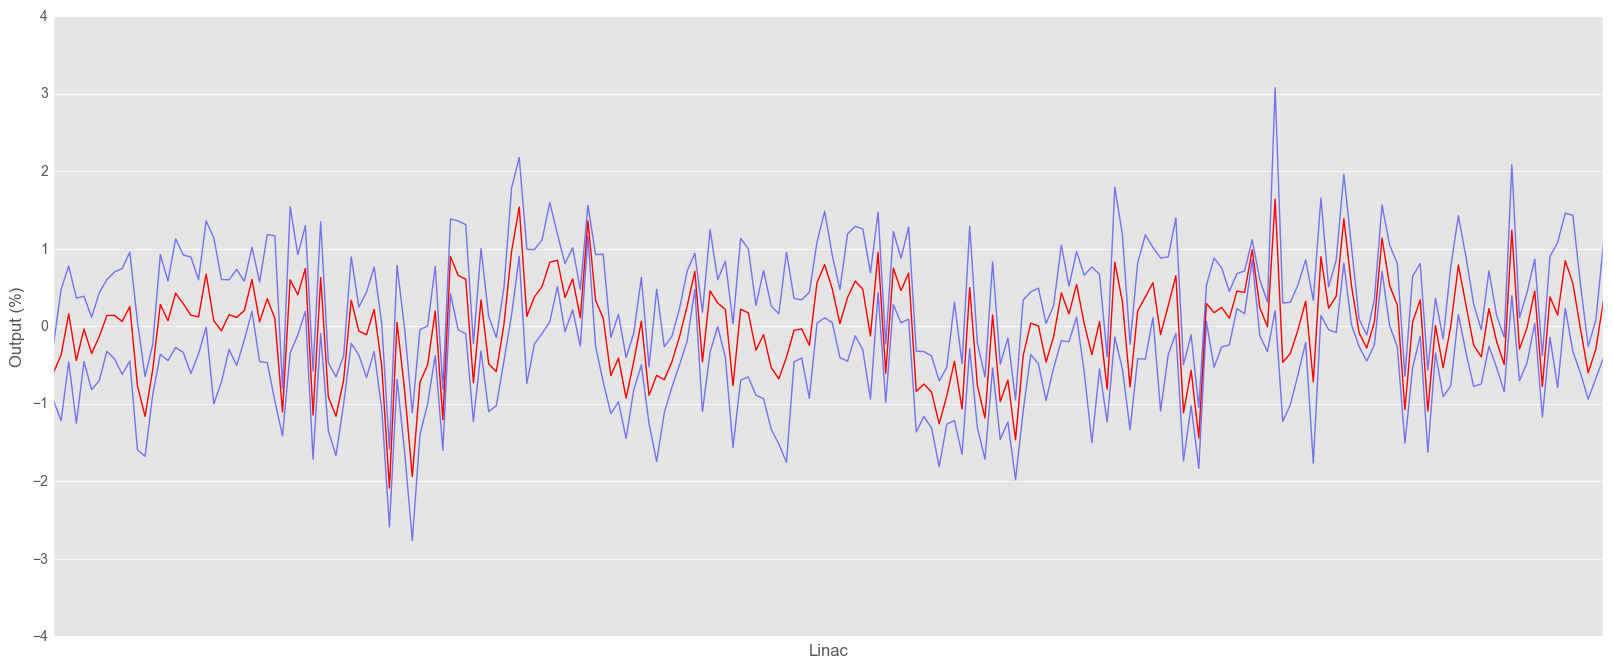

In [27]:
plt.figure(figsize=(20,8))

l = m.groupby('Linac_ID')
#l.describe()
lmean = l.mean()
#lmean = lmean.sort(['OP_Dif'], ascending=True)
#lmean = lmean.sort_values(by='OP_Dif', ascending=True)
lsd = l.std()
lsdnorm=lmean+lsd
lsdnegnorm=lmean-lsd

myplotlinac = lmean['OP_Dif'].plot(kind='line', color='red', alpha = 1)
myplotlinac = lsdnorm['OP_Dif'].plot(kind='line', color='blue', alpha = 0.5)
myplotlinac = lsdnegnorm['OP_Dif'].plot(kind='line', color='blue', alpha = 0.5)

#op_mean_sd = lmean['OP_Dif'].plot(yerr=lsd, kind='bar', width=0.5, color='red', alpha=0.5)
#plt.xlim(0,50)
plt.ylim(-4,4)
plt.ylabel('Output (%)')
plt.xlabel('Linac')

## Hide x axis tick labels (simple 1 line method used)
#plt.tick_params(
#    axis='x',          # changes apply to the x-axis
#    which='both',      # both major and minor ticks are affected
#    bottom='off',      # ticks along the bottom edge are off
#    top='off',         # ticks along the top edge are off
#    labelbottom='off')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.show()

#plt.savefig('OPs/All_Linacs_Means-bar-corr-SD.png', bbox_inches='tight', dpi=300)

### Try and get range filled in
 - could use seaborn for this as might be easier?

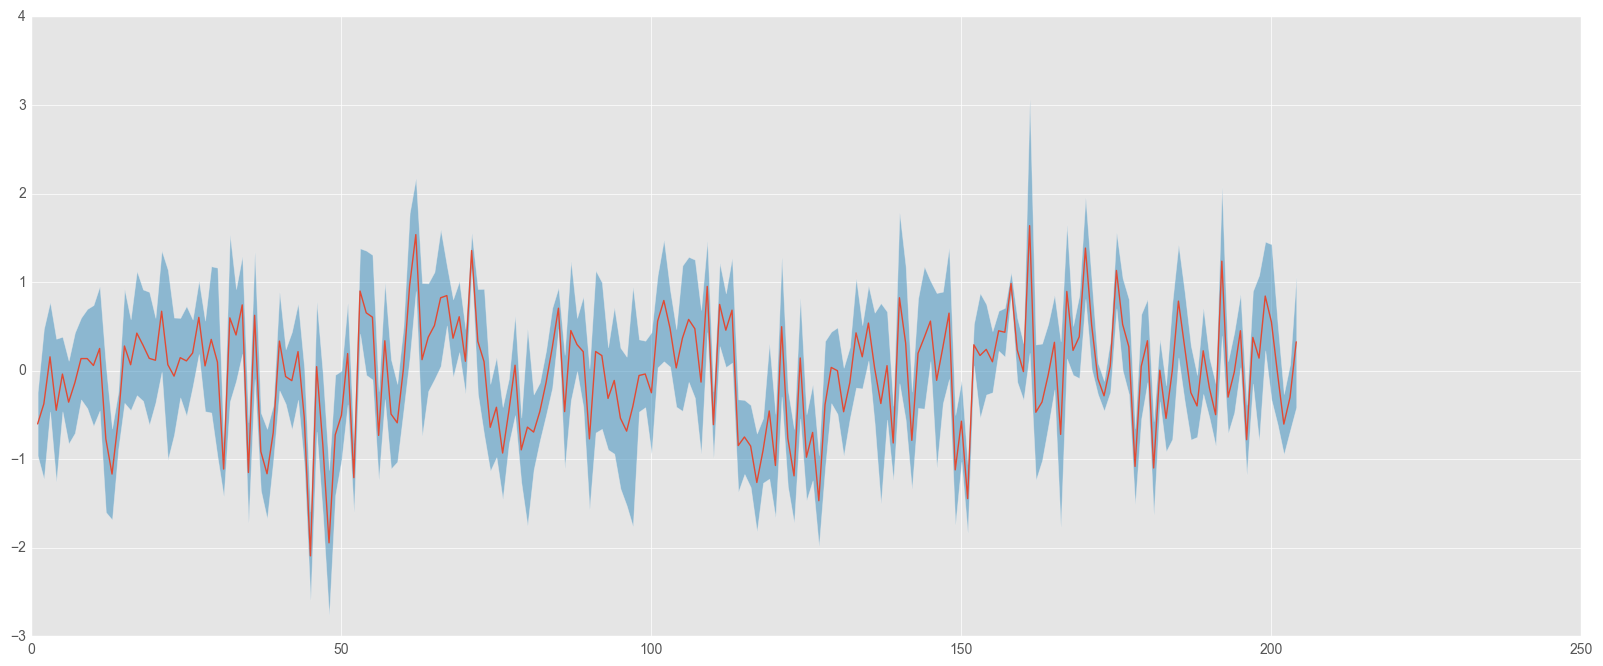

In [28]:
plt.figure(figsize=(20,8))

abc = l['OP_Dif']
l_id = l['Linac_ID'].mean()

plt.fill_between(l_id, (abc.mean()-abc.std()), (abc.mean()+abc.std()),alpha=0.5)
plt.plot(l_id,abc.mean())


#####

#If these seperate bits of data are all combined into a dataframe, then they could be sorted together.

Mean: -0.00935364871923632
SD: 0.878063695677774


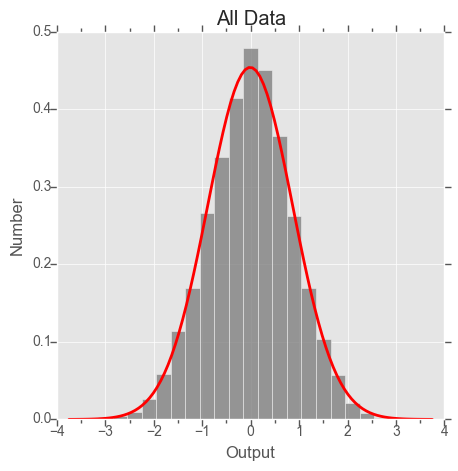

In [29]:
pylab.rcParams['figure.figsize'] = 5, 5 # change size of figures

from matplotlib.ticker import AutoMinorLocator

fig = plt.figure()
axes = fig.add_subplot(1,1,1)
plt.title('All Data')
plt.xlabel("Output")
plt.ylabel("Number")
#plt.xlim(-3.2, +3.2)
#plt.ylim(0, 60)

m['OP_Dif'].hist(bins=25, range=(-3.75, 3.75), normed=True,
                               facecolor = 'grey', alpha = 0.8, ax=axes, rwidth=1)

axes.xaxis.set_minor_locator(AutoMinorLocator(2)) #used to set the number of minor ticks between major ticks
plt.tick_params(which='major', width=1, length=5)
plt.tick_params(which='minor', width=1, length=3)
plt.grid(True, which='major')

mean = m['OP_Dif'].mean()
sd = m['OP_Dif'].std() # need to exclude outliers for this to be a useful calculation.

x = np.linspace(-3.75, 3.75, 100) # add normal distibution fit
plt.plot(x, mlab.normpdf(x,mean,sd), linewidth = 2, color='red')

print('Mean: ' + str(mean))
print('SD: ' + str(sd))
#plt.savefig('OPs/All_Hist.png', bbox_inches='tight', dpi=300)

## Want to change the colour for a centre to make it clearer? Loop through each and give a colour? or create seperate sets fo data to plot?

In [30]:
#### Only single linacs

##Make dataframe contianing only required information
linac_plot = all_data[['Linac_ID','Date','OP_Dif','Measurement_Device']].sort_values(by='Date')

## Filter to only contain specific range of linacs

In [31]:
ID_nos = []
dupes = []

n_linacs = 5

while (len(ID_nos) == 0) or (len(dupes) == 0) or (len(ID_nos)!=len(dupes)):
    ID_nos = np.random.randint(low=min(all_data['Linac_ID']), high=max(all_data['Linac_ID'])+1,size=n_linacs)
    dupes = np.unique(ID_nos)
    print(dupes)
    
print(len(ID_nos))
print(len(dupes))

[  8  58 114 122 180]
5
5


In [32]:
n_linacs = 5
ID_nos = np.random.randint(low=min(all_data['Linac_ID']), high=max(all_data['Linac_ID'])+1,size=n_linacs)

dupes = np.unique(ID_nos)

print(len(ID_nos))
print(len(dupes))

5
5


linac_random


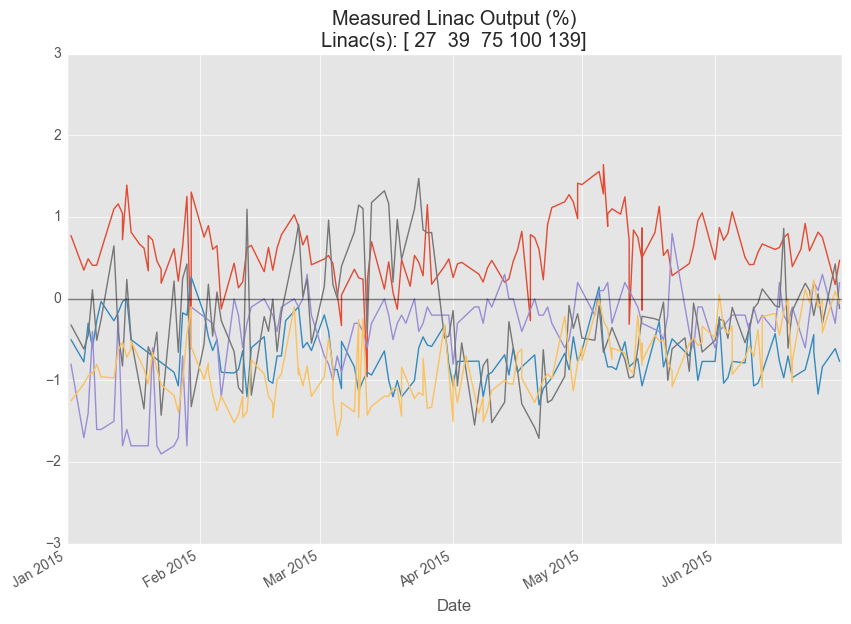

In [33]:
#### Only single linacs

##Make dataframe contianing only required information
linac_plot = all_data[['Linac_ID','Date','OP_Dif','Measurement_Device','Centre_ID']].sort_values(by='Date')

## Filter types: 'linac_range', 'linac_random', linac_IDs', centre_IDs

filter_type = 'linac_random'

l_IDs = [1,2,3] # specify to plot particular linac(s) results
c_IDs = [1] # specify if plotting a particular centre(s) linacs

print(filter_type)

ID_nos = []
dupes = []

if filter_type == 'linac_range':
    ## Filter to only contain specific range of linacs
    start=150
    num=3
    
    ID_nos = np.linspace(start = start, stop = start+num-1, num = num).astype('int_')

    linac_plot_filter = linac_plot[linac_plot['Linac_ID'].isin(ID_nos)
                                  #& (linac_plot['Measurement_Device']!='Farmer')
                                  ]

elif filter_type == 'linac_random':
    ## Filter to select n random linacs
    n_linacs = 5

    if n_linacs > 0.25* max(all_data['Linac_ID']):
        raise Exception("More than 25% of linacs selected, will take too long to get random linac_IDs. You probably don't want to do this....")

    i=0
    while (len(ID_nos) == 0) or (len(dupes) == 0) or (len(ID_nos)!=len(dupes)):
        ID_nos = np.random.randint(low=min(all_data['Linac_ID']), high=max(all_data['Linac_ID'])+1,size=n_linacs)
        dupes = np.unique(ID_nos)
        i=i+1

    if i > 1:
        print(str(i) + " loops required to get unique random values.")

elif filter_type == 'linac_IDs':
    ## Choose which linacs to select by Linac ID
    ID_nos = l_IDs
    
elif filter_type == 'centre_IDs':
    ## Choose which linacs to select by centre ID
    ID_nos = c_IDs # centre IDs

if filter_type == 'centre_IDs':
    linac_plot_filter = linac_plot[linac_plot['Centre_ID'].isin(ID_nos)]
    plot_title = ("Measured Linac Output (%)\nCentre(s): " + str(np.sort(ID_nos)))
else:
    linac_plot_filter = linac_plot[linac_plot['Linac_ID'].isin(ID_nos)]
    plot_title = ("Measured Linac Output (%)\nLinac(s): " + str(np.sort(ID_nos)))

## Group by linac ID
grouped_linacs = linac_plot_filter.groupby('Linac_ID')

## Plot all on same plot
fig, ax = plt.subplots(figsize=(10,7))
for label, df in grouped_linacs:
    df.plot(ax=ax, y='OP_Dif', x='Date', label=label, legend=False, title=plot_title, alpha=1)
plt.ylim(-3,3)
plt.xlim(min(linac_plot['Date'])-pd.DateOffset(days=0),max(linac_plot['Date'])+pd.DateOffset(days=0.5))
ax.axhline(0,color='black', alpha=0.5)
plt.show()

#fig.savefig('OPs/Selected_Linac_OPs_trend.png', bbox_inches='tight', dpi=300)

### Try and get Mean / SD / Range for each linac and then group these into centres to analysie the variation within a centre.
1. Calc mean for each linac.
2. Group into sites
3. Calculate stats within sites

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52]
Centre_ID
35.0     1
29.0     2
21.0     3
30.0     4
48.0     5
31.0     6
32.0     7
33.0     8
34.0     9
13.0    10
36.0    11
28.0    12
23.0    13
46.0    14
40.0    15
42.0    16
49.0    17
47.0    18
7.0     19
26.0    20
4.0     21
17.0    22
14.0    23
3.0     24
1.0     25
20.0    26
41.0    27
27.0    28
16.0    29
12.0    30
18.0    31
25.0    32
38.0    33
52.0    34
15.0    35
11.0    36
45.0    37
9.0     38
44.0    39
19.0    40
2.0     41
39.0    42
51.0    43
22.0    44
24.0    45
5.0     46
50.0    47
6.0     48
37.0    49
8.0     50
43.0    51
10.0    52
Name: order, dtype: int32
Centre_ID
35.0    0.000000
29.0    0.000000
21.0    0.000000
30.0    0.000000
48.0    0.000000
31.0    0.000000
32.0    0.000000
33.0    0.000000
34.0    0.000000
13.0    0.000000
36.0    0.000000
28.0    0.115239
23.0    0.120592
4

[]

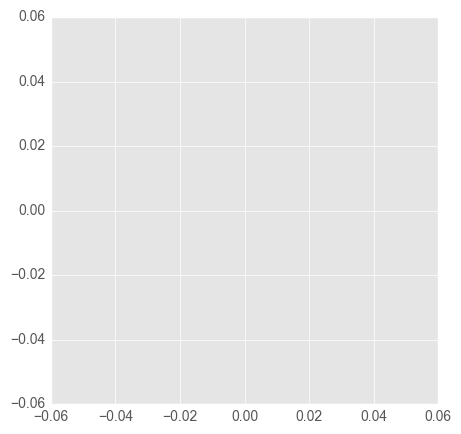

In [34]:
## Group by linac and calculate mean
group_linacs = all_data.groupby('Linac_ID')
linacs1 = group_linacs.mean()

##  group this by centre
centre1 = linacs1.groupby('Centre_ID')

## calculate stats from linac means within each centre
c_std = centre1['OP_Dif'].std()
c_min = centre1['OP_Dif'].min()
c_max = centre1['OP_Dif'].max()
c_mean = centre1['OP_Dif'].mean()
c_range = c_max-c_min
c_id = c_std.index

## make a new DF ready contianing the stats so can order the results
## compile a dicitonary of data ready to make the df
l_c_data = {'c_std': c_std,
          'c_min': c_min,
          'c_max': c_max,
          'c_mean': c_mean,
          'c_range': c_range,
          'c_id': c_id
         }

lc_df = pd.DataFrame(l_c_data)
lc_df=lc_df.sort_values(by='c_range', ascending=True)

lc_order = np.arange(1,53)
print(lc_order)

lc_df['order'] = lc_order

lc_df.head()

print(lc_df['order'])
print(lc_df['c_range'])

plt.plot(x=lc_df.order, y=lc_df.c_range) ###  this ios not working...?

## plot the results
# plt.plot(c_mean, color='red', label = 'mean')
# plt.fill_between(x=c_mean.index, y1=c_min, y2=c_max, alpha=0.5, label = 'range')
# plt.ylabel("Centre_ID")
# plt.xlabel("Output (%)")
# plt.legend()

(735597.0, 735781.0)

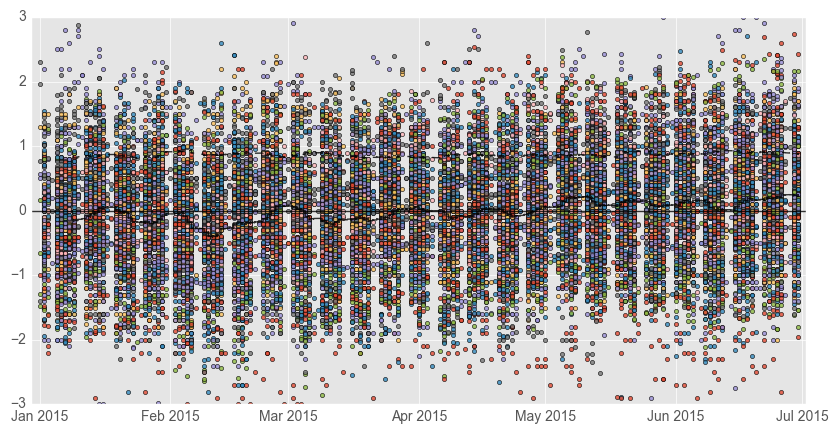

In [35]:
m = all_data_datesort[(all_data_datesort.OP_Dif >-5) & (all_data_datesort.OP_Dif < 5) & (all_data_datesort.Date < "01/July/2015")] # remove outliers
pylab.rcParams['figure.figsize'] = 10, 5 # change size of figures
#fig1 = plt.figure()
#axes1 = fig1.add_subplot(1,1,1)
#plt.title('Machine Output Variation')
#plt.xlabel("Date")
#plt.ylabel("Measured Output")
#plt.ylim(-4, 4)
#axes1.xaxis.set_minor_locator(AutoMinorLocator(4)) #used to set the number of minor ticks between major ticks
#plt.tick_params(which='major', width=1, length=5)
#plt.tick_params(which='minor', width=1, length=3)
#plt.grid(True, which='major')

#print(max(m['Centre_ID']))
#m.values
#mark_colors = np.array(m['Centre_ID'])
#print(mark_colors)

#x=np.arange(1,m['OP_Dif'].count()+1)
x=m['Date']
y=m['OP_Dif']

##This just plots all as the same colour
#plt.plot_date(x, y, alpha=0.4, color='b')
#yerr=(m['OPError']*m['OPRatio'])/100

##The below plots each centre as a different colour
df = pd.DataFrame(dict(x=m['Date'],y=m['OP_Dif'],label=m['Centre_ID']))
#df = pd.DataFrame(dict(x=m['Date'],y=m['OP_Dif'],label=m['Linac_ID']))

groups = df.groupby('label')

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot_date(group.x,group.y,label=name, alpha=0.8, ms=3)
#ax.legend(loc='best')
#ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., numpoints=1, ncol=2)
plt.ylim(-3,3)
#plt.show()

ysd=m['SD_Prev1000']
ymean=all_data_datesort['Mean_Prev1000']
ax.plot(x,ysd, label='SD', color='black', ls='--', alpha=0.8)
ax.plot(x,ymean, label='Mean', color='black', alpha=0.8)
ax.axhline(0,color='black', alpha=0.8)
#ax.fill_between(x, ymean)
#ax.fill_between(t, mu1+sigma1, mu1-sigma1, facecolor='blue', alpha=0.5)
#ax.legend()
#plt.ylim(0.5,1.5)
plt.xlim(min(x)-pd.DateOffset(days=2),max(x)+pd.DateOffset(days=2))

#plt.savefig('OPs/All_date_scatter_group_by_centre-mean_sd.png', bbox_inches='tight', dpi=300)
#plt.savefig('OPs/All_date_scatter_group_by_centre.png', bbox_inches='tight', dpi=300)

In [36]:
x = all_data['Date'].dt.dayofyear
y = all_data['OP_Dif']
grad, intercept, r_value, p_value, std_err = stats.linregress(x,y)
grad

0.0021210229446935679

In [37]:
## use the statsmodels package to give summary of fitting results

import statsmodels.api as sm

x = all_data['Date'].dt.dayofyear
y = all_data['OP_Dif']

model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
print(results.summary())
print(results.params)

                            OLS Regression Results                            
Dep. Variable:                 OP_Dif   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     392.1
Date:                Wed, 11 Jan 2017   Prob (F-statistic):           1.34e-86
Time:                        20:54:42   Log-Likelihood:                -31384.
No. Observations:               24501   AIC:                         6.277e+04
Df Residuals:                   24499   BIC:                         6.279e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.2053      0.011    -18.084      0.0

In [38]:
## use scipy to get numerical regression statistics
## and also reproduce plot with the gregression line?

grad, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print('Grad: ' + str(grad))
print('Int: ' + str(intercept))
print('r squared: ' + str(r_value**2))
print('p_val (assume slope of zero): ' + str(p_value))
print('Std Err: ' + str(std_err))

## from this statistically the slope is non zero (due to large number of measurements)
## however r_squared is also small so 

Grad: 0.00212102294469
Int: -0.205287395929
r squared: 0.0157545657663
p_val (assume slope of zero): 1.34203675543e-86
Std Err: 0.000107107448436


(-3, 3)

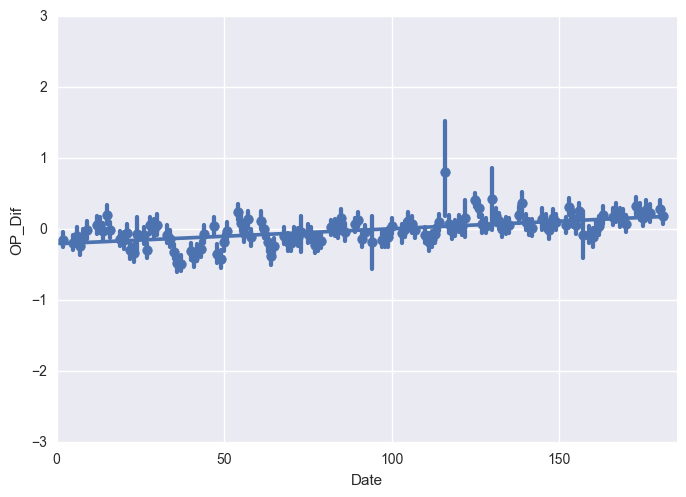

In [44]:
## plot of automatic trend line using seaborn on the whole dataset
import seaborn as sns
all_data.head(3)

x = all_data['Date'].dt.dayofyear
y = all_data['OP_Dif']

#plt.plot(the_date,the_val, ls='', marker='o', ms=3, alpha=0.2)
sns.regplot(x,y,x_bins=181,truncate=True)
plt.xlim(0,185)
plt.ylim(-3,3)

## can see that there is a slight upward trend. and one set of odd results?

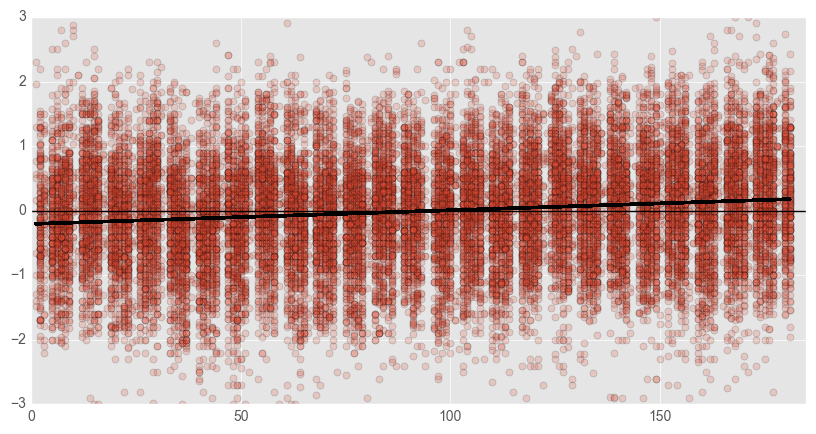

In [40]:
## plot opf all results with fit over the top

plt.plot(x,y, ls='', marker='o', alpha=0.2, ms=5)
plt.xlim(0,185)
plt.ylim(-3,3)
plt.axhline(0, color='black', lw=1)
## add trendline
plt.plot(x,(grad*x+intercept), color='black', lw=2)

In [41]:
test_data = all_data[all_data['Centre_ID'] == 3] 
len(test_data['Farmer'].unique())
print(test_data['Farmer'].unique())

if test_data['Farmer'].unique() == ['Farmer']:
    print('Farmer')

['Non-Farmer']


In [42]:
x = range(1,all_data['Centre_ID'].max()) # number of centres
print(x)

range(1, 52)


#### It doesnt look like it is identifying when there is only FArmer data available correctly

In [46]:
### Try and create boxplot for each centre using seaborne

#centre = 2

#centre = [6] # select centre
centre = range(1,all_data['Centre_ID'].max()+1) # all centres

for i in centre:
    centre = i
    plt.figure(figsize=(12,8))
    small_data = all_data[all_data['Centre_ID'] == centre]
    #small_data['Farmer'].unique()

    plot_data = small_data

    if len(small_data['Farmer'].unique()) != 1:
        hue = plot_data['Farmer']
        hue_order = ['Non-Farmer','Farmer']
        extra_title = ''
    else:
        hue=None
        hue_order=None
        if small_data['Farmer'].unique() == 'Farmer':
            extra_title = ': (Farmer Data Only)'
        else:
            extra_title = ': (Non-Farmer Data Only)'

    #sns.stripplot(x=plot_data['Centre_ID'], y=plot_data['OP_Dif'], jitter=0.2, linewidth=1, alpha=0.1, color='grey')
    #sns.boxplot(y=plot_data['OP_Dif'], x=plot_data['Centre_ID'])
    #sns.swarmplot(y=plot_data['OP_Dif'], x=plot_data['Centre_ID'], hue=plot_data['Linac_Manufacturer'])
    sns.violinplot(y=plot_data['OP_Dif'], x=plot_data['Linac_ID'], inner='stick',linewidth=1, bw=0.5,
                   hue=hue, hue_order=hue_order, split=True, legend=False, orient='v')
    #g.set(xticklabels=[])
    #sns.axlabel(xlabel='Linac', ylabel='Output Difference (%)')
    sns.plt.title('Output Variations for Centre ' + str(centre) + extra_title)
    sns.plt.ylim(-5,5)
    plt.legend(loc='upper left')
    #plt.savefig('OPs/Violins/additional/Centre' + str(centre) +'.png', bbox_inches='tight', dpi=300)
    plt.close()

C:\Users\mb22\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


### Some analysis for different linac models/measurement equipment etc

In [47]:
m.tail(1)

,Centre_ID,NHS_PP,Group,Linac_Manufacturer,Linac_Model,Linac_Install_Date,Linac_ID,Date,Measurement_Device,OP_Dif,Recording,Comments,Week,Month,Farmer,date_delta,Short_Date,weekday,SD_Prev1000,Mean_Prev1000
24500,52,NHS,6,Elekta,Agility,2006,204,2015-06-30,QA3,1.641026,Atlas Database,Users would like to be able to get data out in...,27,6,Non-Farmer,180.0,30/06/2015,1,0.876017,0.22591


### Linac Manufacturer

Mean Max: 0.417733842634
Mean Min: -0.163863649313
Mean Range: 0.581597491947


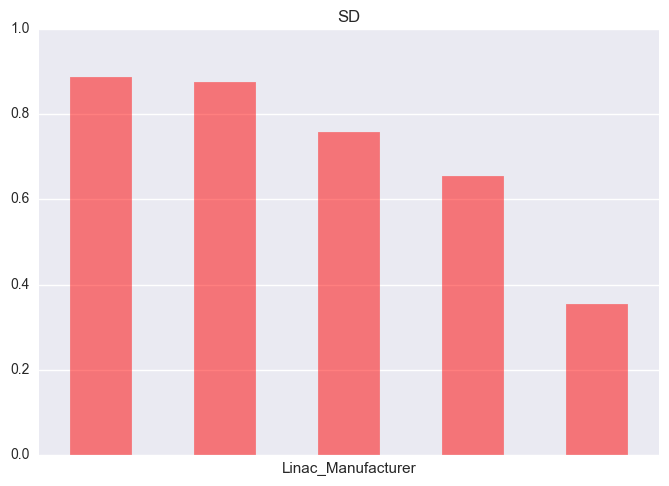

In [48]:
l = m.groupby(m['Linac_Manufacturer'])
## calc mean for each linac
lmean = l.mean()
## sort into order
#lmean = lmean.sort(['OP_Dif'], ascending=False) #prev v18
lmean = lmean.sort_values(by='OP_Dif', ascending=False)
lsd=l.std()
#lsd = lsd.sort(['OP_Dif'], ascending=False) #prev v18
lsd = lsd.sort_values(by='OP_Dif', ascending=False)
lsdneg=-lsd
lsdnorm=lmean+lsd # to ensure SD is centred around mean
lsdnegnorm=lmean-lsd
#myplotlinac = lmean['OP_Dif'].plot(kind='bar', color='red', alpha = 0.5)
myplotlinac = lsd['OP_Dif'].plot(kind='bar', color='red', alpha = 0.5)
plt.title('SD')
plt.ylim(0,1)

myplotlinac.axes.get_xaxis().set_ticks([])

mean_max = max(lmean['OP_Dif'])
mean_min = min(lmean['OP_Dif'])
mean_range = mean_max - mean_min
print('Mean Max: ' + str(mean_max))
print('Mean Min: ' + str(mean_min))
print('Mean Range: ' + str(mean_range))

#print(lsd.mean())

#plt.savefig('OPs/All_Linacs_Means-bar-corr-large_text.png', bbox_inches='tight', dpi=300)

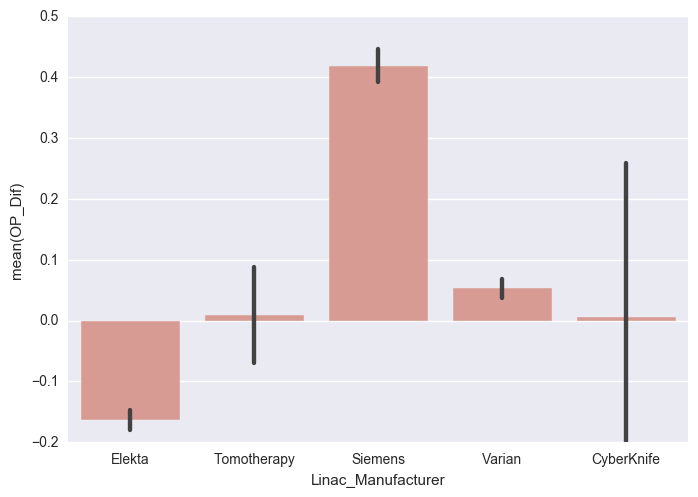

In [49]:
ax11 = sns.barplot(x=all_data['Linac_Manufacturer'], y=all_data['OP_Dif'], ci=95, color="salmon", saturation=.5)

In [50]:
all_data.head()

,Centre_ID,NHS_PP,Group,Linac_Manufacturer,Linac_Model,Linac_Install_Date,Linac_ID,Date,Measurement_Device,OP_Dif,Recording,Comments,Week,Month,Farmer,date_delta,Short_Date,weekday
0,1,NHS,5,Elekta,Agility,2014,1,2015-01-06,Farmer,0.50,Paper,NaN,2,1,Farmer,5.0,06/01/2015,1
1,1,NHS,5,Elekta,Agility,2014,1,2015-01-16,Farmer,-0.90,Paper,NaN,3,1,Farmer,15.0,16/01/2015,4
2,1,NHS,5,Elekta,Agility,2014,1,2015-01-19,Farmer,-0.60,Paper,NaN,4,1,Farmer,18.0,19/01/2015,0
3,1,NHS,5,Elekta,Agility,2014,1,2015-01-26,Farmer,-0.60,Paper,NaN,5,1,Farmer,25.0,26/01/2015,0
4,1,NHS,5,Elekta,Agility,2014,1,2015-02-04,Farmer,0.06,Paper,NaN,6,2,Farmer,34.0,04/02/2015,2


(-5, 5)

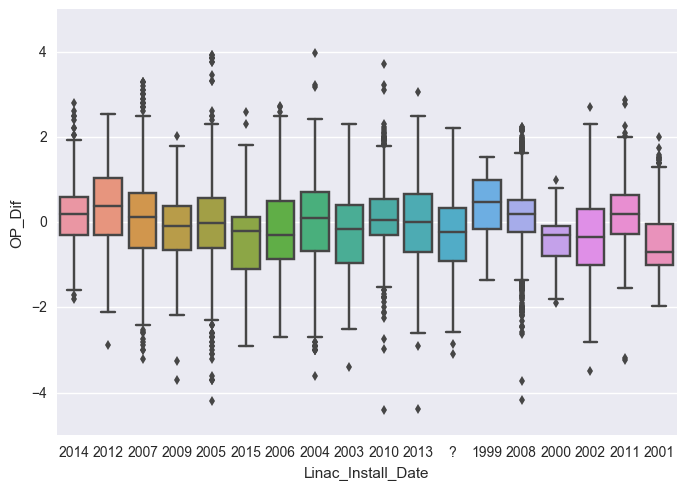

In [51]:
## get the list of years and sort them for use in plot
years = all_data['Linac_Install_Date'].unique()
## get and sort the integers
years_int = sorted([x for x in years if isinstance(x, int)])
## get the strings
years_non_int = [x for x in years if not isinstance(x, int)]
## combine string+int back together
years_all = years_int + years_non_int

## produce plot
ax123 = sns.boxplot(x="Linac_Install_Date", y="OP_Dif", data=all_data, order=years_all)
plt.ylim(-5,5)

In [52]:
all_data['Linac_Manufacturer'].unique() ## Names of linac manufacturers

array(['Elekta', 'Tomotherapy', 'Siemens', 'Varian', 'CyberKnife'], dtype=object)

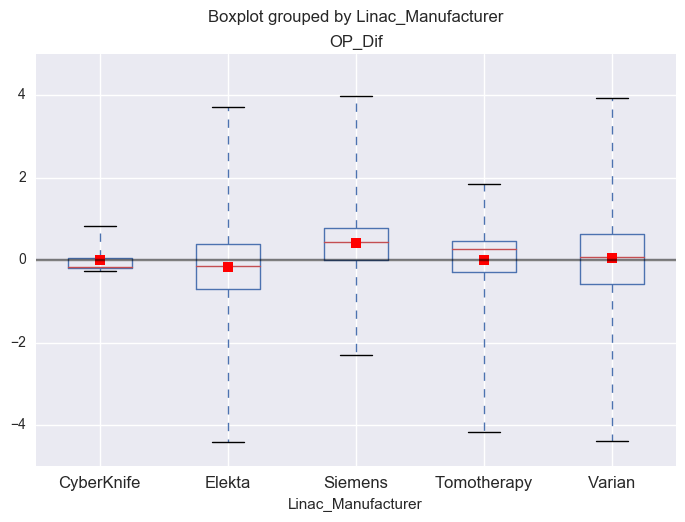

In [53]:
l_man = m
l_man_box = l_man.boxplot(column=['OP_Dif'],by='Linac_Manufacturer', whis='range', showmeans='True')
l_man_box.set_ylim(-5,5)
l_man_box.axhline(0, alpha = 0.5, color = 'black')
plt.show()


### Measurement Device

### Farmer vs Other

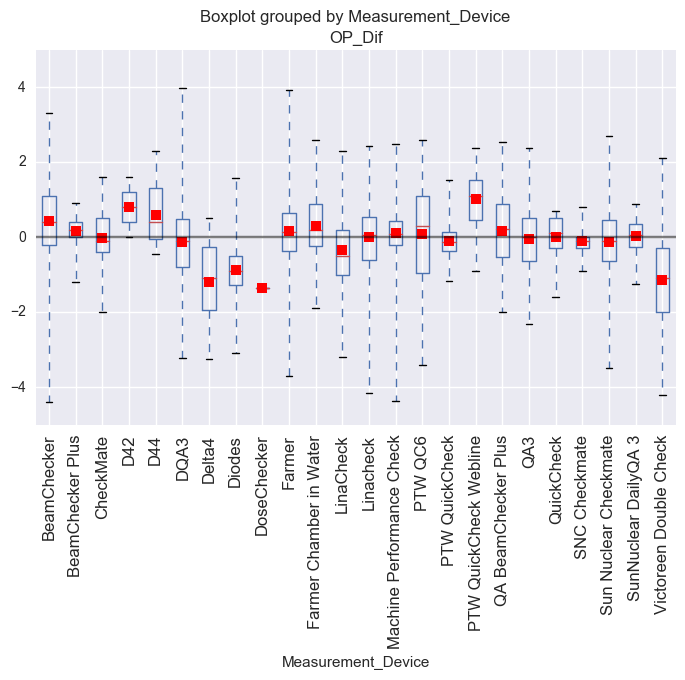

In [54]:
equip = m
equip_box = equip.boxplot(column=['OP_Dif'],by='Measurement_Device', whis='range', showmeans='True', rot=90, figsize=(8,5))
equip_box.set_ylim(-5,5)
equip_box.axhline(0, alpha = 0.5, color = 'black')
plt.show()

# Note that D44 is a DoseChecker

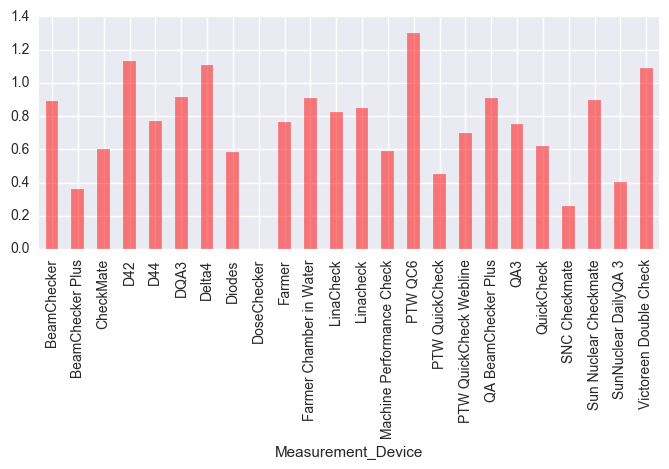

In [55]:
equip_group = m.groupby(m['Measurement_Device'])
## calc mean for each linac
equip_mean = equip_group.mean()
equip_sd = equip_group.std()

myplotequip = equip_sd['OP_Dif'].plot(kind='bar', color='red', alpha = 0.5, figsize=(8,3))

### Are Farmers better?

An intial look doesnt indicate any clear difference between the consistency of Farmer or other measurement devices.
Tehre is also no differnce seen between manufacturers.

## Age of Linac

In [ ]:
import seaborn as sb

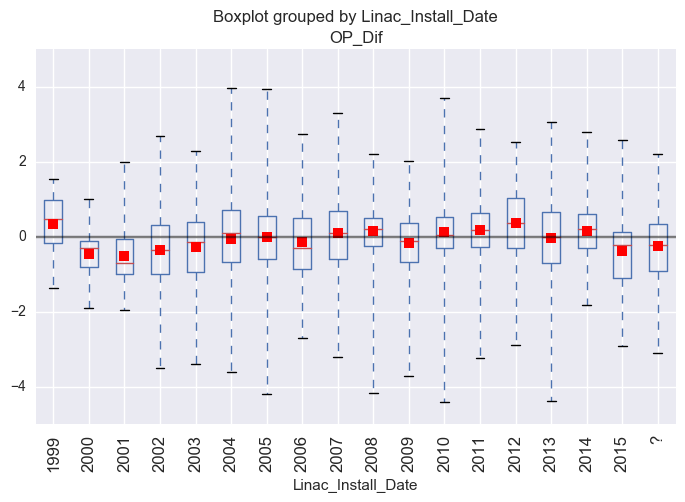

In [56]:
age = m

age_box = age.boxplot(column=['OP_Dif'],by='Linac_Install_Date', whis='range', showmeans='True', rot=90, figsize=(8,5))
age_box.set_ylim(-5,5)
age_box.axhline(0, alpha = 0.5, color = 'black')
plt.show()

#plt.savefig('OPs/Year_boxplots.png', bbox_inches='tight', dpi=300)

In [ ]:
#sns.violinplot(x='Linac_Install_Date', y='OP_Dif', data=m, jitter=1, linewidth=1, hue='Linac_Manufacturer')
#sns.plt.show()

No obvious trend seen with age of linac.
In reality, you would have to know how often they require recalibrating to know this, which would be very difficult to guage form a 6 month set of data.

## Apply Gamma Values to plots
Allow determination of variation in outcomes

In [ ]:
gamma = 2.0 ## (Bentzen used 2.3 for Tumour control, 5.2 for mild/moderate reactions, 0.9 for severe reactions)

plt.figure(figsize=(20,10))
#plt.rcParams.update({'font.size': 22})
l = m.groupby('Linac_ID')
## calc mean for each linac
lmean = l.mean()
lmean_gamma = lmean*gamma

## add an extra column with the OP multiplied by gamma value

lmean['Outcome'] = np.nan
lmean['Outcome'] = (lmean['OP_Dif']*gamma)

## sort into order
lmean = lmean.sort_values(by=['OP_Dif'], ascending=True)
lmean_gamma = lmean_gamma.sort_values(by=['OP_Dif'], ascending=True)
lsd=l.std()
lsd = lsd.sort_values(by=['OP_Dif'], ascending=True)
lsdneg=-lsd
lsdnorm=lmean+lsd # to ensure SD is centred around mean
lsdnegnorm=lmean-lsd
#myplotlinac = lmean['OP_Dif'].plot(kind='bar', color='red', alpha = 0.5)
#myplotlinac = lsd['OP_Dif'].plot(kind='bar', color='red', alpha = 0.5)
myplotlinac = lmean['Outcome'].plot(kind='bar', color='red', alpha = 0.5)

myplotlinac.axes.get_xaxis().set_ticks([])

stats_for = lmean['OP_Dif']

mean_mean = stats_for.mean()
mean_max = max(stats_for)
mean_min = min(stats_for)
mean_range = mean_max - mean_min

print('Mean Mean: ' + str(mean_mean))
print('Mean Max: ' + str(mean_max))
print('Mean Min: ' + str(mean_min))
print('Mean Range: ' + str(mean_range))

mean_med = np.median(stats_for)
mean_95 = np.percentile(stats_for, 95, interpolation='higher')
mean_05 = np.percentile(stats_for, 5, interpolation='lower')
mean_perc_range = mean_95-mean_05

print()
print('Mean Median: ' + str(mean_med))
print('Mean 95th Percentile: ' + str(mean_95))
print('Mean 5th Percentile: ' + str(mean_05))
print('Percentile Range: ' + str(mean_perc_range))

In [ ]:
myplotlinac = lmean['OP_Dif'].plot(kind='hist', bins=13, color='red', alpha = 0.5, figsize=(5,5))
plt.xlim(-3,3)
plt.show()

## Are centres happier to let machines run with low output than high?


In [ ]:
## how many linacs outside of 2%?

perc_tol = np.arange(0,3,0.1) # absolute tol
#perc_tol = np.arange(-3,3,0.1)
perc_tol_results= np.empty(0)

for x in perc_tol:
    lmean_oot = lmean[(lmean.OP_Dif > x) | (lmean.OP_Dif < -x)] # only consider absolute tol
    #lmean_oot = lmean[(lmean.OP_Dif > x)]
    no_oot = len(lmean_oot)
    perc_oot = (no_oot/len(lmean))*100
    perc_tol_results = np.append(perc_tol_results, no_oot)
    print('No. Linacs outside +/- ' + str(x) + '% : ' + str(no_oot) + ' (' + "%.1f" % perc_oot + '%)')
    
plt.plot(perc_tol,(perc_tol_results/len(lmean)*100), marker='o', markersize=3)
plt.axhline(50, ls='--')
plt.axhline(10, ls='--')
plt.axhline(5, ls='--')
#plt.axhline(90, ls='--') # if negative tols considered
#plt.axhline(95, ls='--') # if negative tols considered
plt.xlabel('Tolerance (%)')
plt.ylabel('Proportion of Linacs Outside of Tolerenace')

all_results = np.concatenate(([perc_tol],[perc_tol_results]),axis=1)
all_results = np.reshape(all_results,(2,len(perc_tol))).T

np.set_printoptions(precision=2, suppress=True)
#print(perc_tol_results,perc_tol)
#print(all_results)

#plt.savefig('OPs/Proportion_Linac_OOT.png', bbox_inches='tight', dpi=300)

In [ ]:
## Difference centres - no difference between centres seen.

plt.scatter(lmean['Group'],lmean['OP_Dif'], alpha=0.5)
plt.xlabel('Group')
plt.axhline(0, color='black', alpha=0.3)
plt.ylim(-3,3)
plt.ylabel('Output Dif (%)')
plt.xlim(0.1,9.9)


In [ ]:
plt.scatter(lmean['Centre_ID'],lmean['OP_Dif'], alpha=0.5)
plt.xlabel('Centre_ID')
plt.axhline(0, color='black', alpha=0.5)
plt.ylim(-3,3)
plt.ylabel('Output Dif (%)')
plt.xlim(0,)

### What is maximum variation within centres

In [ ]:
centre = m
centre_box = centre.boxplot(column=['OP_Dif'],by='Centre_ID', whis='range', showmeans='True', rot=90, figsize=(8,5))
centre_box.set_ylim(-5,5)
centre_box.axhline(0, alpha = 0.5, color = 'black')


In [ ]:
plt.figure(figsize=(20,10))
#plt.rcParams.update({'font.size': 22})
l = m.groupby('Linac_ID')
## calc mean for each linac
lmean = l.mean()
## sort into order
lmean = lmean.sort_values(by=['OP_Dif'], ascending=False)
lsd=l.std()
lsd = lsd.sort_values(by=['OP_Dif'], ascending=False)
lsdneg=-lsd
lsdnorm=lmean+lsd # to ensure SD is centred around mean
lsdnegnorm=lmean-lsd
myplotlinac = lmean['OP_Dif'].plot(kind='bar', color='red', alpha = 0.5)
#myplotlinac = lsd['OP_Dif'].plot(kind='bar', color='red', alpha = 0.5)

myplotlinac.axes.get_xaxis().set_ticks([])

mean_max = max(lmean['OP_Dif'])
mean_min = min(lmean['OP_Dif'])
mean_range = mean_max - mean_min
print('Mean Max: ' + str(mean_max))
print('Mean Min: ' + str(mean_min))
print('Mean Range: ' + str(mean_range))

#print(lsd.mean())

#plt.savefig('OPs/All_Linacs_Means-bar-corr-large_text.png', bbox_inches='tight', dpi=300)

1. Find mean of each linac
2. Box plot - Group by centre ID
3. Normal plot of Mean vs Centre ID

In [ ]:
plt.plot(lmean['Centre_ID'], lmean['OP_Dif'], marker='o', ls='None')
lmean.groupby(lmean['Centre_ID'])

In [ ]:
lmean2 = m.groupby(['Centre_ID','Linac_ID'],  as_index=True)
#lmean2g=lmean2.agg([np.mean, np.max, np.min, len]) #can calc multiple things on the grouped data

## means of all linacs for each centre
lmeang = lmean2['OP_Dif'].agg([np.mean])

## calcualte maximum and minimum within the Centre_ID groups
lmeang_max = lmeang.max(level='Centre_ID')
lmeang_min = lmeang.min(level='Centre_ID')

## calc range form min and max
lmeang_range = lmeang_max-lmeang_min

lmeang_range = lmeang_range.sort_values(by='mean', ascending=False)

## mean and sd of all Centre means
mean_mean = np.mean(lmeang_range['mean'])
mean_sd = np.std(lmeang_range['mean'])

## print(lmeang_range)
print('Max Range of Means in a single centre = '+ str(max(lmeang_range['mean'])) + ' %')

## plot all centres ranges with mean of means and sd
plt.bar(range(len(lmeang_range)), lmeang_range['mean'], color='red', alpha=0.5)
plt.xlabel('Site')
plt.ylabel('Mean Output Range at Site')
plt.axhline(mean_mean, ls='--', alpha=0.8, label='Mean')
#plt.axhline(mean_mean+mean_sd, ls=':', alpha=0.8)
#plt.axhline(mean_mean-mean_sd, ls=':', alpha=0.8)
plt.xlim(0,45)
plt.legend()
plt.xticks([])
## Note that if only 1 linac at a site then range will be zero. These should be excluded.

In [ ]:
lmeang_range.head(7)

 #### So Far the maximum range is in Centre 7.
 - Need to find a way fo getting this value out automatically

### Get weekly (or monthly) average and standard deviation from each linac (Linac_ID)
Use this to try and remove long term trends from calcualtion of SD.
- Calibrations should standd out as having a larger SD than the others from that group.
- Maybe ignore the 4 weeks (or month) with the largest SD as these may be calibrations.


## Determine mean of each linac and whether this is statistically different from zero.
- Then want to compare farmer to non-farmer to see if they are statistically different.
- Return results in either a DF or np array.

In [ ]:
## loop through all liancs to analyse
all_linacs = range(max(all_data['Linac_ID']))

all_results=[] # set empty list ready for storing values

for i in all_linacs:
    chosen_linac = all_linacs[i]+1
    ## filter the original dataframe to give boolean vals
    chosen_linac_filter = all_data['Linac_ID'] == chosen_linac

    ## use filter to extract required data
    ind_linac = all_data[chosen_linac_filter]
    ## extract only OP data
    ind_linac_op = ind_linac['OP_Dif']

    ## calculate mean of OPs
    ind_linac_op_mean = ind_linac_op.mean()
    ind_linac_op_sd = ind_linac_op.std()
    ind_linac_op_num = len(ind_linac_op)

    ## check the mean agrees with that int he describe()

    ## null hypothesis is that mean = 0
    ## want to compare population mean to this value

    #print(ind_linac_op_mean)
    #print(ind_linac_op_sd)
    #print(ind_linac_op_num)
    #ind_linac_op.describe()

    ## compare the values to zero and return p-val
    compare_val = 0

    compare_result = stats.ttest_1samp(ind_linac_op,compare_val)

    results = [chosen_linac,ind_linac_op_num,ind_linac_op_mean,ind_linac_op_sd,compare_result[0],compare_result[1]]
    column_names = ['Linac_ID','n','mean','sd','t-stat','p-val']
    ## results = [linac_id,n,mean,sd,t-stat,p-val]

    all_results.append(results)
    #print(compare_result)
    #plt.hist(ind_linac_op)

## convert list to numpy array and then dataframe
all_results_array = np.asarray(all_results)
all_results_df = pd.DataFrame(all_results_array, columns = column_names)
all_results_df.head()

In [ ]:
## sort the DF for clearer plotting
df_sort = all_results_df.sort_values(by='p-val')
df_sort['sort_index'] = range(0,len(df_sort))

## specify value to plot on graph for comparison
p_val_compare = 0.05

plt.plot(df_sort['sort_index'],df_sort['p-val'])
plt.plot([0,max(df_sort['sort_index'])],[p_val_compare,p_val_compare])
plt.xlim(0,max(df_sort['sort_index']))
plt.xlabel('sort_index (linac)')
plt.ylabel('p-val')

## note that anything below the line indicates the mean value is statistically significantly different from zero (p-val < 0.05)

In [ ]:
## how many linacs are significantly different from a mena of zero?

## filter the original dataframe to give boolean vals
p_val_filter = all_results_df['p-val'] < p_val_compare

## use filter to extract required data
p_val_linacs = all_results_df[p_val_filter]

no_sig_p_val_linacs = len(p_val_linacs['p-val'])
print(no_sig_p_val_linacs)

perc_sig_p_val_linacs = 100*no_sig_p_val_linacs/max(all_data['Linac_ID'])
print(str(round(perc_sig_p_val_linacs,1)) + '% of linacs statistically do not have a mean of zero over the measurement period')

## Repeat for centres to see if centre mean is equal to zero

In [ ]:
## loop through all liancs to analyse
all_centres = range(max(all_data['Centre_ID']))

all_results=[] # set empty list ready for storing values

for i in all_centres:
    chosen_centre = all_centres[i]+1
    ## filter the original dataframe to give boolean vals
    chosen_centre_filter = all_data['Centre_ID'] == chosen_centre

    ## use filter to extract required data
    ind_centre = all_data[chosen_centre_filter]
    ## extract only OP data
    ind_centre_op = ind_centre['OP_Dif']

    ## calculate mean of OPs
    ind_centre_op_mean = ind_centre_op.mean()
    ind_centre_op_sd = ind_centre_op.std()
    ind_centre_op_num = len(ind_centre_op)

    ## check the mean agrees with that int he describe()

    ## null hypothesis is that mean = 0
    ## want to compare population mean to this value

    #print(ind_linac_op_mean)
    #print(ind_linac_op_sd)
    #print(ind_linac_op_num)
    #ind_linac_op.describe()

    ## compare the values to zero and return p-val
    compare_val = 0

    compare_result = stats.ttest_1samp(ind_centre_op,compare_val)

    results = [chosen_centre,ind_centre_op_num,ind_centre_op_mean,ind_centre_op_sd,compare_result[0],compare_result[1]]
    column_names = ['Centre_ID','n','mean','sd','t-stat','p-val']
    ## results = [centre_id,n,mean,sd,t-stat,p-val]

    all_results.append(results)
    #print(compare_result)
    #plt.hist(ind_linac_op)

## convert list to numpy array and then dataframe
all_results_array = np.asarray(all_results)
all_results_df = pd.DataFrame(all_results_array, columns = column_names)
all_results_df.head()

In [ ]:
## sort the DF for clearer plotting
df_sort = all_results_df.sort_values(by='p-val')
df_sort['sort_index'] = range(0,len(df_sort))

## specify value to plot on graph for comparison
p_val_compare = 0.05

plt.plot(df_sort['sort_index'],df_sort['p-val'])
plt.plot([0,max(df_sort['sort_index'])],[p_val_compare,p_val_compare])
plt.xlim(0,max(df_sort['sort_index']))
plt.xlabel('sort_index (centre)')
plt.ylabel('p-val')

## note that anything below the line indicates the mean value is statistically significantly different from zero (p-val < 0.05)

In [ ]:
## how many centres are significantly different from a mean of zero?

## filter the original dataframe to give boolean vals
p_val_filter = all_results_df['p-val'] < p_val_compare

## use filter to extract required data
p_val_centres = all_results_df[p_val_filter]

no_sig_p_val_centres = len(p_val_centres['p-val'])
print(no_sig_p_val_centres)

perc_sig_p_val_centres = 100*no_sig_p_val_centres/max(all_data['Centre_ID'])
print(str(round(perc_sig_p_val_centres,1)) + '% of centres statistically do not have a mean of zero over the measurement period')

## Compare Farmer vs Non-Farmer results using t-test for each linac

In [ ]:
## loop through all liancs to analyse
all_linacs = range(max(all_data['Linac_ID']))
print(max(all_linacs))

all_results=[] # set empty list ready for storing values

for i in all_linacs:
    chosen_linac = all_linacs[i]+1
    farmer = 'Farmer'

    ## filter the original dataframe to give boolean vals
    chosen_linac_filter = all_data['Linac_ID'] == chosen_linac
    farmer_filter = all_data['Measurement_Device'] == farmer
    non_farmer_filter = all_data['Measurement_Device'] != farmer

    ## use filter to extract required data
    ind_linac_farm = all_data[chosen_linac_filter & farmer_filter]
    ind_linac_non_farm = all_data[chosen_linac_filter & non_farmer_filter]
    ## extract only OP data
    ind_linac_op_farm = ind_linac_farm['OP_Dif']
    ind_linac_op_non_farm = ind_linac_non_farm['OP_Dif']

    ## calculate mean of OPs-farmer
    ind_linac_op_mean_farm = ind_linac_op_farm.mean()
    ind_linac_op_sd_farm = ind_linac_op_farm.std()
    ind_linac_op_num_farm = len(ind_linac_op_farm)
    ## calculate mean of OPs-non-farmer
    ind_linac_op_mean_non_farm = ind_linac_op_non_farm.mean()
    ind_linac_op_sd_non_farm = ind_linac_op_non_farm.std()
    ind_linac_op_num_non_farm = len(ind_linac_op_non_farm)

    ## compare the values to zero and return p-val
    ## comapre individual linac to zero
    #compare_val = 0
    #compare_result = stats.ttest_1samp(ind_linac_op,compare_val)
    ## comapre farmer to non-farmer
    compare_result = stats.ttest_ind(ind_linac_op_farm,ind_linac_op_non_farm)

    results = [chosen_linac,
               ind_linac_op_num_farm,
               ind_linac_op_num_non_farm,
               ind_linac_op_mean_farm,
               ind_linac_op_mean_non_farm,
               ind_linac_op_sd_farm,
               ind_linac_op_sd_non_farm,
               compare_result[0],
               compare_result[1],
               ind_linac_op_mean_farm-ind_linac_op_mean_non_farm]
    column_names = ['Linac_ID','n-farm','n-non-farm','mean-farm','mean-non-farm','sd-farm','sd-non-farm','t-stat','p-val','mean_dif']
    ## results = [linac_id,n,mean,sd,t-stat,p-val]...

    all_results.append(results)
    #print(compare_result)
    #plt.hist(ind_linac_op)

    ## convert list to numpy array and then dataframe
    all_results_array = np.asarray(all_results)
    all_results_df = pd.DataFrame(all_results_array, columns = column_names)
    #tests = all_results_df
    all_results_df.head()

## how many also between specified mean_dif in dose
## work through a range of different differneces in the means > 2% very unlikely!
difs = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5]
result_dif = []

for i in difs:
    dif_test = i
    tests = all_results_df
    #print(dif_test)
    tests = tests[pd.notnull(tests['p-val'])]
    tests = tests[tests['mean_dif']<dif_test]
    tests = tests[tests['mean_dif']>-dif_test]
    result_dif.append((dif_test,len(tests)))
    #print(len(tests))
print(result_dif)

x_plot = [result_dif[i][0] for i in range(len(result_dif))]
y_plot = [result_dif[i][1] for i in range(len(result_dif))]

plt.plot(np.array(x_plot)/203,np.array(y_plot)/203)

In [ ]:
## remove linacs which do not have Farmer measurements (these have NaN as results of the ttest.)

all_results_df = all_results_df[pd.notnull(all_results_df['p-val'])]

## remove results with mean_dif <0.5%

## eliminate high vals
#all_results_df = all_results_df[all_results_df.mean_dif<1]
##eliminate low vals
#all_results_df = all_results_df[all_results_df.mean_dif>1]

#df = df[np.isfinite(df['EPS'])]

## sort the DF for clearer plotting
df_sort = all_results_df.sort_values(by='p-val')
df_sort['sort_index'] = range(0,len(df_sort))

## specify value to plot on graph for comparison
p_val_compare = 0.05

plt.plot(df_sort['sort_index'],df_sort['p-val'])
plt.plot([0,max(df_sort['sort_index'])],[p_val_compare,p_val_compare])
plt.xlim(0,max(df_sort['sort_index']))
plt.xlabel('sort_index (linac)')
plt.ylabel('p-val')

#print(df_sort)
## note that anything below the line indicates the mean value is statistically significantly different from zero (p-val < 0.05)

In [ ]:
## Plot of farmer vs non-farmer to see if linear relationship

x = all_results_df['mean-farm']
y = all_results_df['mean-non-farm']

# fit with np.polyfit to get grad and intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

plt.figure(figsize=(7,7))
plt.xlim(-2,2)
plt.ylim(-2,2)

## plot raw data as points
plt.plot(x, y,'o')
## plot fit of data calcualted from x points.
plt.plot(x, slope*x + intercept)

print('Least Squares')
print('grad: ' + str(m))
print('intercept: ' + str(b))
print('r-squared: ' + str(r_value**2))

medslope,medintercept,lo_slope,hi_slope = stats.mstats.theilslopes(y, x)
plt.plot(x, medslope*x + medintercept)
plt.plot(x, lo_slope*x + medintercept,'r')
plt.plot(x, hi_slope*x + medintercept,'r')

#ax1.fill_between(x, y1, y2, where=y2 >= y1, facecolor='green', interpolate=True)

print('Theil-Sen')
print('grad: ' + str(medslope))
print('intercept: ' + str(medintercept))


In [ ]:
### same again with seaborn to add trendline

sns.lmplot(x='mean-farm',y='mean-non-farm',data=all_results_df)

In [ ]:
sns.residplot(x='mean-farm',y='mean-non-farm',data=all_results_df)

In [ ]:
## how many centres are significantly different from a mean of zero?

## filter the original dataframe to give boolean vals
p_val_filter = all_results_df['p-val'] < p_val_compare

## use filter to extract required data
p_val_farmer = all_results_df[p_val_filter]

no_sig_p_val_farmer = len(p_val_farmer['p-val'])
print(no_sig_p_val_farmer)

perc_sig_p_val_farmer = 100*no_sig_p_val_farmer/len(pd.unique(all_results_df['Linac_ID']))
print(str(round(perc_sig_p_val_farmer,1)) + '% of linacs statistically do not have agreement between farmer and other measurements')

In [ ]:
## List of linacs which do not have Farmer vs Other agreement

#list of sorted values
print(p_val_farmer[['Linac_ID','p-val','mean_dif']].sort_values(by='mean_dif'))

## want to also add the difference in means as while 'significant' it might not be relevant if a small difference in the mean

In [ ]:
plt.plot(range(len(p_val_farmer)),p_val_farmer['mean_dif'])

In [ ]:
## plot of mean val vs mean dif

x = all_results_df['mean_dif']
y = all_results_df['p-val']

x_mean = x.mean()
x_median = x.median()
x_sd = x.std()

plt.plot(x,y,marker='o',ls='')
plt.xlim(-1.5,1.5)
plt.ylim(0,1.2)
plt.xlabel('Mean Dif between Farmer and Other')
plt.ylabel('P-Value')

#plt.plot(x, mlab.normpdf(x,x_mean,x_sd), ls='', marker='o', color='red')
#print(x_mean)

## the data does not fit to a normal distribution. More liekly a t-distribution., but not really important.
## visually the mean/median/mode is at zero as expected.

